In [655]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [656]:
modelo=pd.read_csv('../data/Marketing.csv',low_memory=False,sep=';' )

# Analisis del modelo

In [657]:
modelo

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [658]:
modelo.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [659]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [660]:
modelo.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [661]:
modelo.shape

(41188, 21)

In [662]:
modelo.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Que % acepto la oferta

In [663]:
aceptaron = modelo.loc[modelo['y'] == 'yes']
aceptaron

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [664]:
len(aceptaron.index)/len(modelo.index)*100

11.265417111780131

### Que % rechazo la oferta

In [665]:
rechazaron = modelo.loc[modelo['y'] == 'no']
rechazaron

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [666]:
len(rechazaron.index)/len(modelo.index)*100

88.73458288821988

## Analisis de la columnas

*1 - age (numeric)

*2 - job : type of job (categorical: ‘admin.’,‘blue-collar’,‘entrepreneur’,‘housemaid’,‘management’,‘retired’,‘self-employed’,‘services’,‘student’,‘technician’,‘unemployed’,‘unknown’)

*3 - marital : marital status (categorical: ‘divorced’,‘married’,‘single’,‘unknown’; note: ‘divorced’ means divorced or widowed)

*4 - education (categorical: ‘basic.4y’,‘basic.6y’,‘basic.9y’,‘high.school’,‘illiterate’,‘professional.course’,‘university.degree’,‘unknown’)

*5 - default: Does the lead has any default(unpaid)credit (categorical: ‘no’,‘yes’,‘unknown’)

*6 - housing: Does the lead has any housing loan? (categorical: ‘no’,‘yes’,‘unknown’)

*7 - loan: Does the lead has any personal loan? (categorical: ‘no’,‘yes’,‘unknown’)

*8 - contact: contact communication type (categorical: ‘cellular’,‘telephone’)

*9 - month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)

*10 - day_of_week: last contact day of the week (categorical: ‘mon’,‘tue’,‘wed’,‘thu’,‘fri’)

*11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=‘no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

*12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

*13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

*14 - previous: number of contacts performed before this campaign and for this client (numeric)

*15 - poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,‘nonexistent’,‘success’)

*16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

*17 - cons.price.idx: consumer price index - monthly indicator (numeric)

*18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

*19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

*20 - nr.employed: number of employees - quarterly indicator (numeric)

*21 - y - has the client subscribed a term deposit? (binary: ‘yes’,‘no’)

In [667]:
modelo.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Edad

In [668]:
modelo['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

<AxesSubplot:>

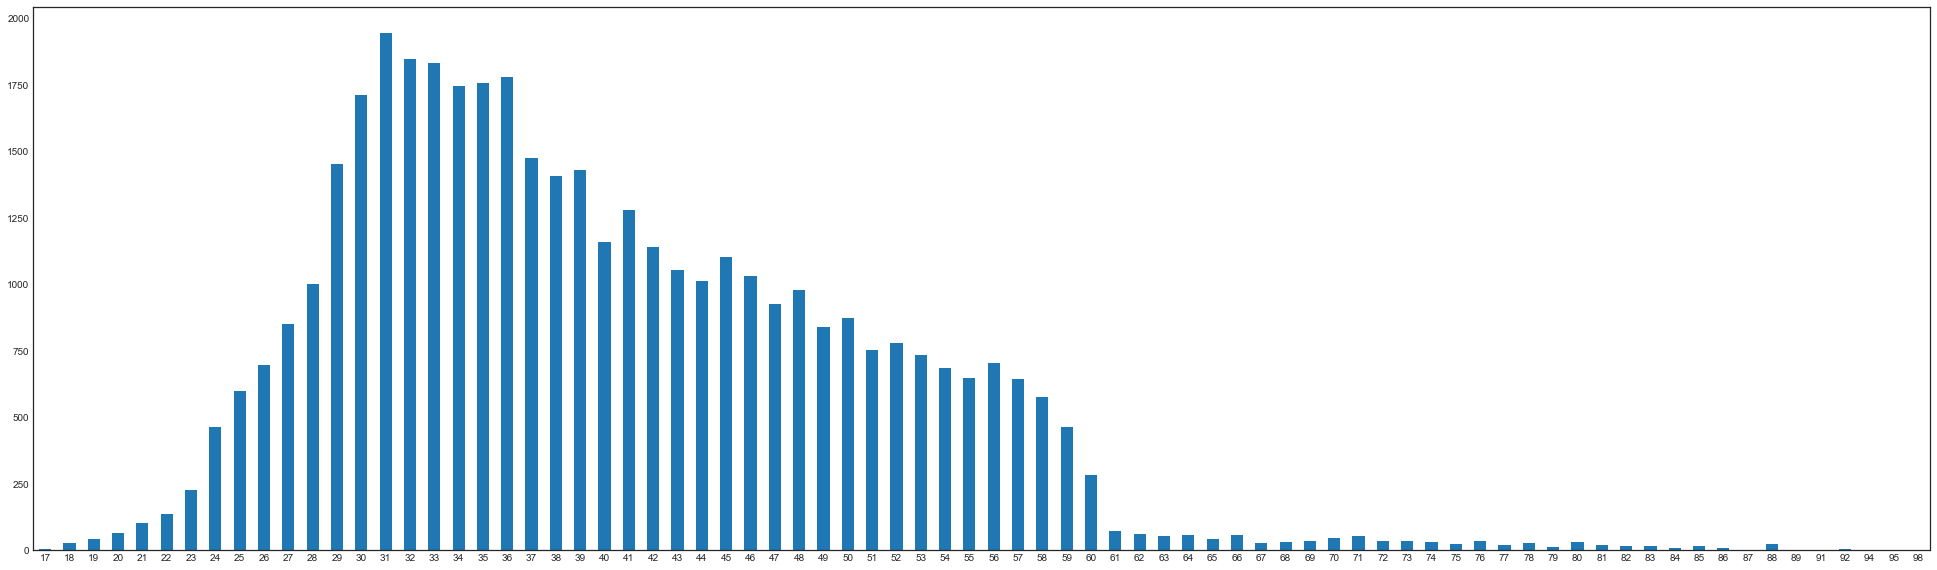

In [669]:
modelo['age'].value_counts().sort_index().plot(kind='bar',figsize=(34,10),rot=0 )

<AxesSubplot:>

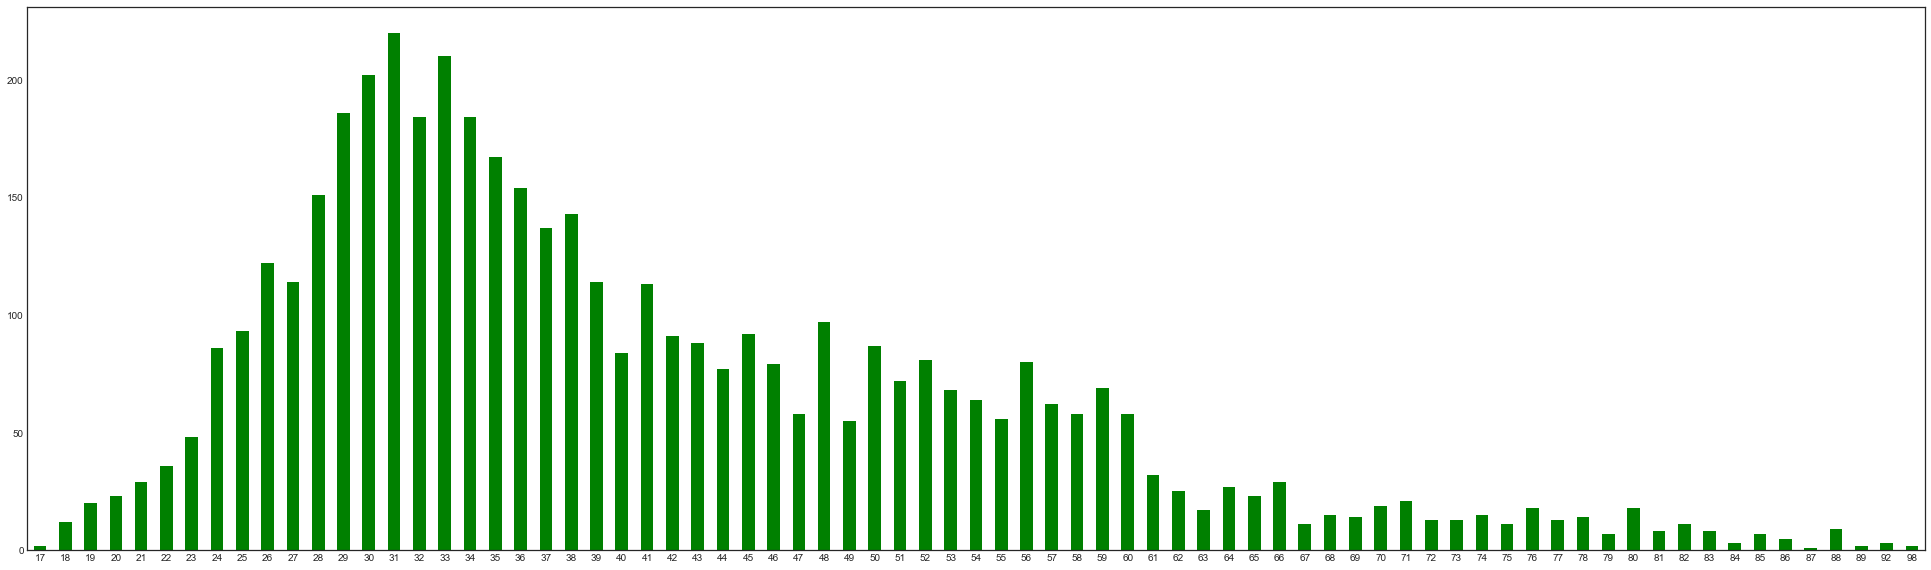

In [670]:
aceptaron['age'].value_counts().sort_index().plot(kind='bar',figsize=(34,10),rot=0,color='green' )

Text(0.5, 1.0, 'age')

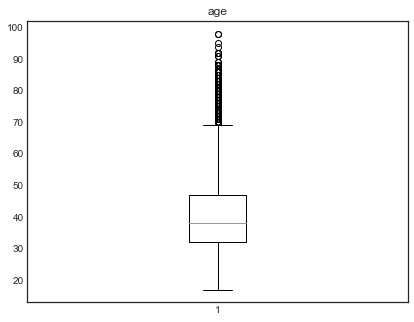

In [671]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(523)
plt.boxplot(modelo['age'])
ax.set_title('age')

### Como vemos que hay algunos outliers, los elimino

<AxesSubplot:>

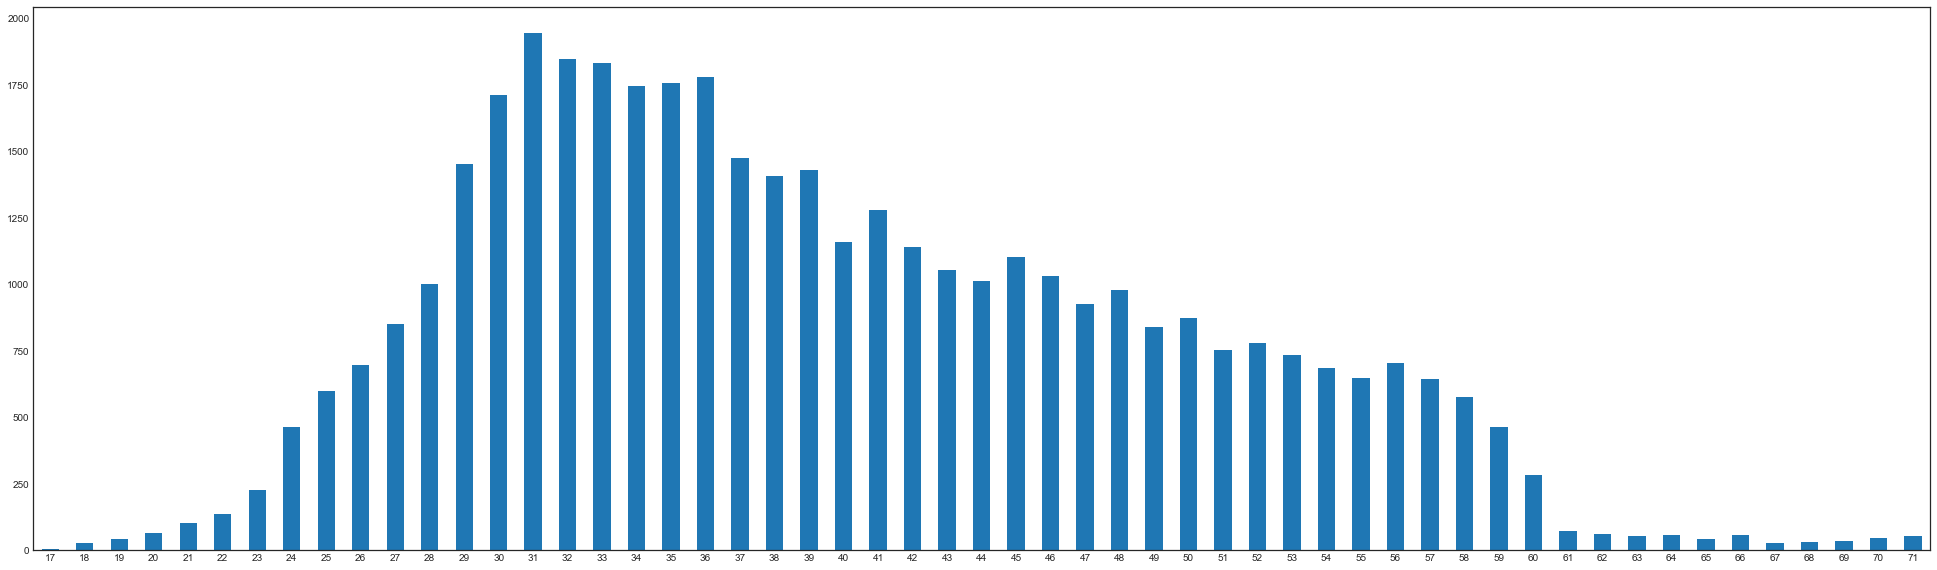

In [672]:
modelo = modelo[(np.abs(stats.zscore(modelo['age'])) < 3)]
modelo['age'].value_counts().sort_index().plot(kind='bar',figsize=(34,10),rot=0 )

## Trabajo

In [673]:
modelo['job'].value_counts()

admin.           10420
blue-collar       9253
technician        6743
services          3969
management        2919
entrepreneur      1456
self-employed     1421
retired           1384
housemaid         1041
unemployed        1014
student            875
unknown            324
Name: job, dtype: int64

<AxesSubplot:>

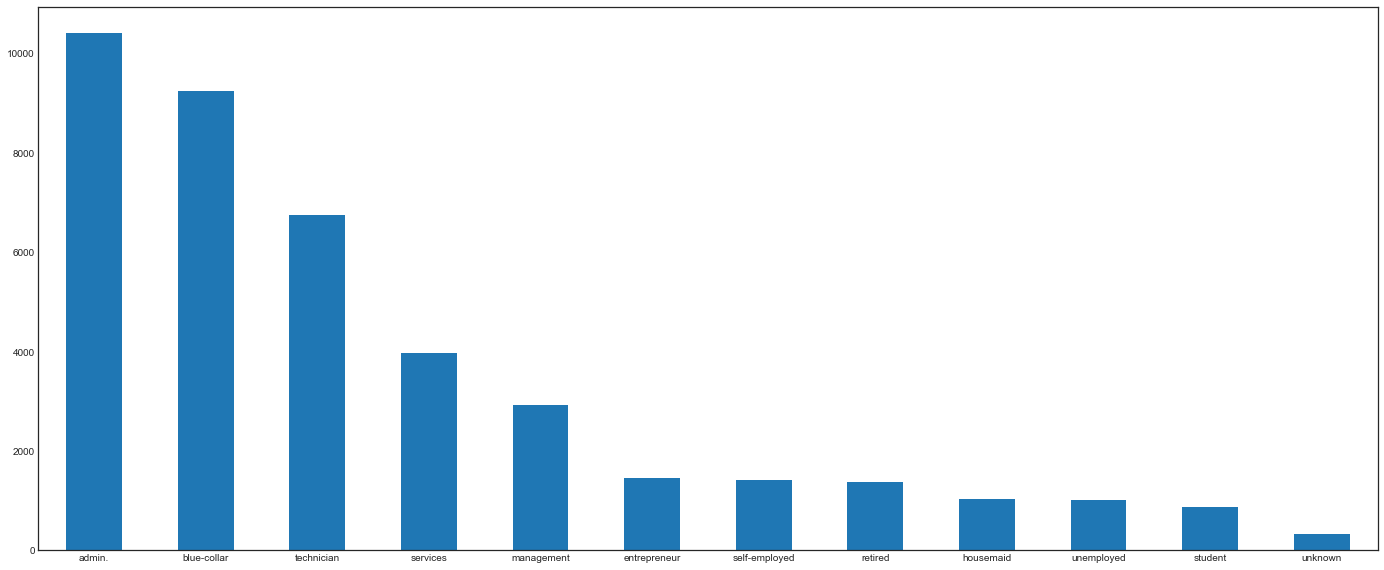

In [674]:
modelo['job'].value_counts().plot(kind='bar',figsize=(24,10),rot=0 )

<AxesSubplot:>

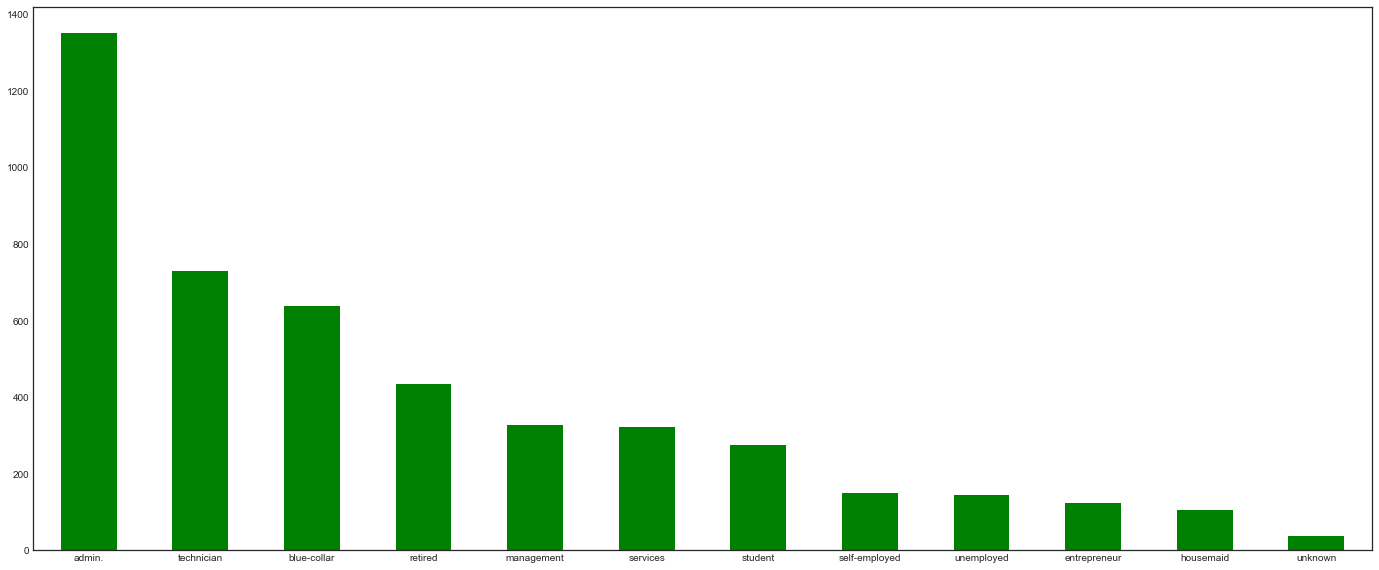

In [675]:
aceptaron['job'].value_counts().plot(kind='bar',figsize=(24,10),rot=0,color='green' )

## Estado civil

In [676]:
modelo['marital'].value_counts()

married     24690
single      11559
divorced     4490
unknown        80
Name: marital, dtype: int64

<AxesSubplot:>

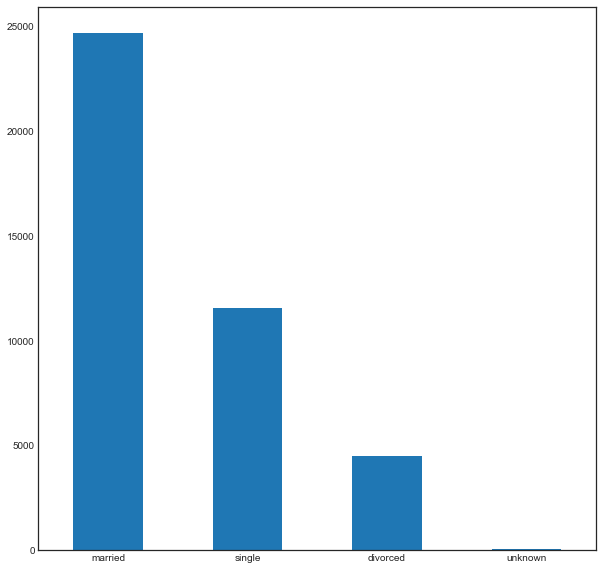

In [677]:
modelo['marital'].value_counts().plot(kind='bar',figsize=(10,10),rot=0 )

<AxesSubplot:>

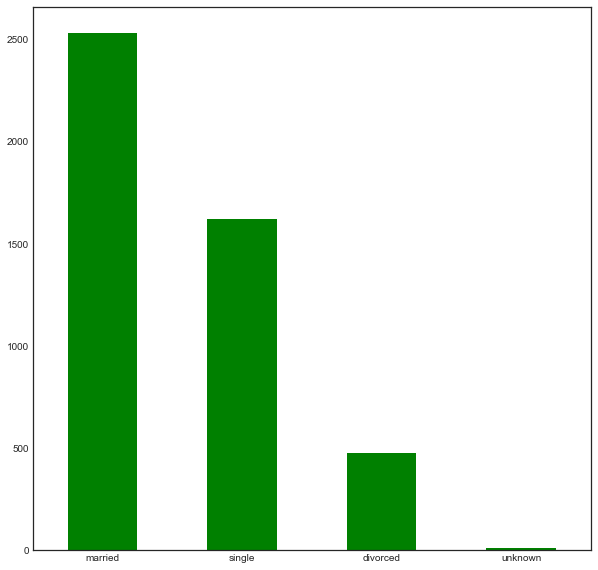

In [678]:
aceptaron['marital'].value_counts().plot(kind='bar',figsize=(10,10),rot=0, color='green' )

## Educacion

In [679]:
modelo['education'].value_counts()

university.degree      12122
high.school             9489
basic.9y                6022
professional.course     5214
basic.4y                3984
basic.6y                2280
unknown                 1691
illiterate                17
Name: education, dtype: int64

<AxesSubplot:>

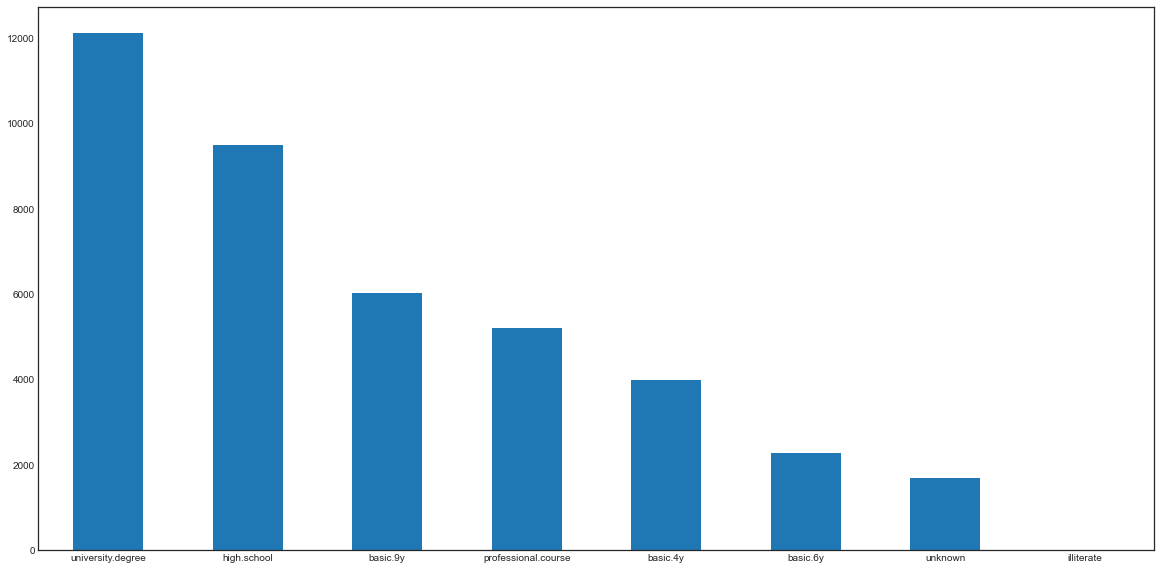

In [680]:
modelo['education'].value_counts().plot(kind='bar',figsize=(20,10),rot=0 )

<AxesSubplot:>

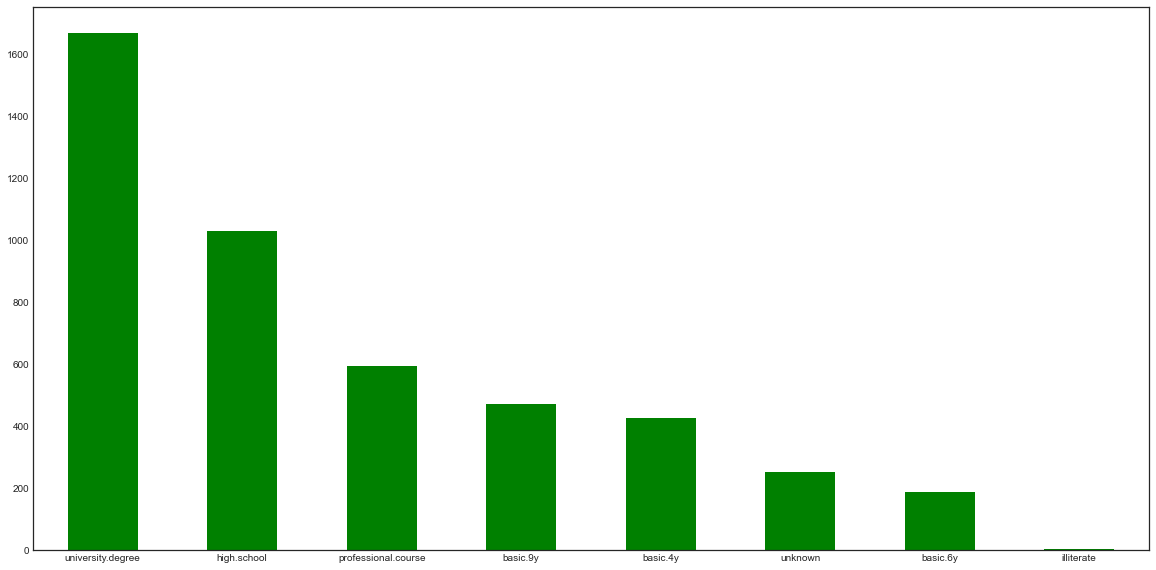

In [681]:
aceptaron['education'].value_counts().plot(kind='bar',figsize=(20,10),rot=0, color='green' )

### Agrupo basic.9y,basic.6y,basic.4y en uno solo

In [682]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    modelo.loc[modelo['education'] == i, 'education'] = "middle.school"

modelo['education'].value_counts()

middle.school          12286
university.degree      12122
high.school             9489
professional.course     5214
unknown                 1691
illiterate                17
Name: education, dtype: int64

## Si la persona tiene algun credito sin pagar (default)

In [683]:
modelo['default'].value_counts()

no         32258
unknown     8558
yes            3
Name: default, dtype: int64

<AxesSubplot:>

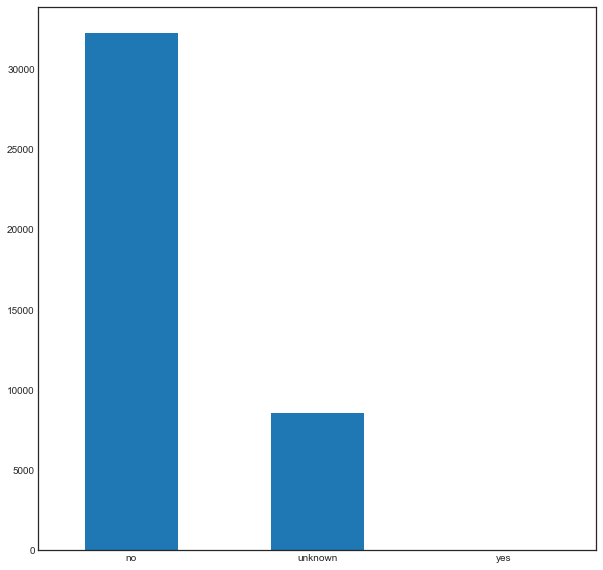

In [684]:
modelo['default'].value_counts().plot(kind='bar',figsize=(10,10),rot=0 )

<AxesSubplot:>

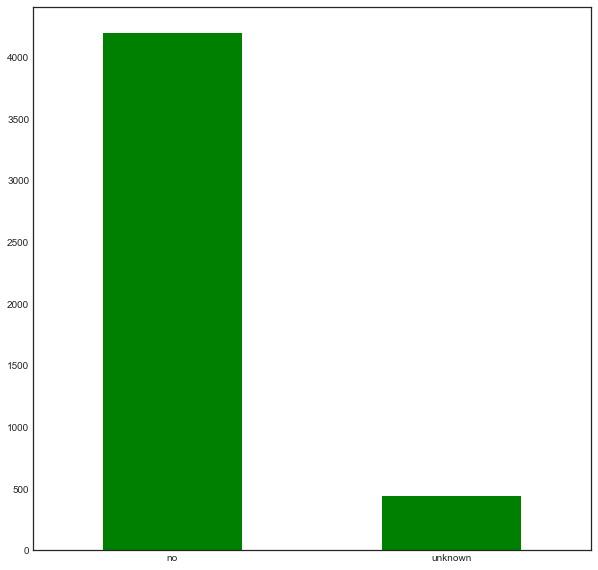

In [685]:
aceptaron['default'].value_counts().plot(kind='bar',figsize=(10,10),rot=0, color='green' )

## Dueño de casa

In [686]:
modelo['housing'].value_counts()

yes        21374
no         18462
unknown      983
Name: housing, dtype: int64

<AxesSubplot:>

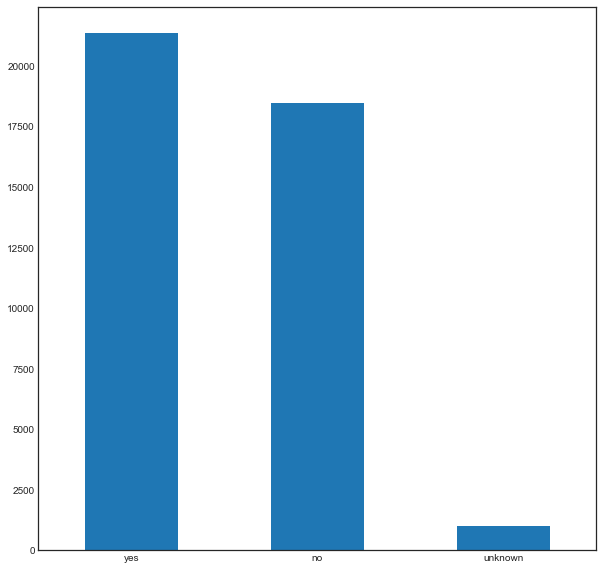

In [687]:
modelo['housing'].value_counts().plot(kind='bar',figsize=(10,10),rot=0 )

<AxesSubplot:>

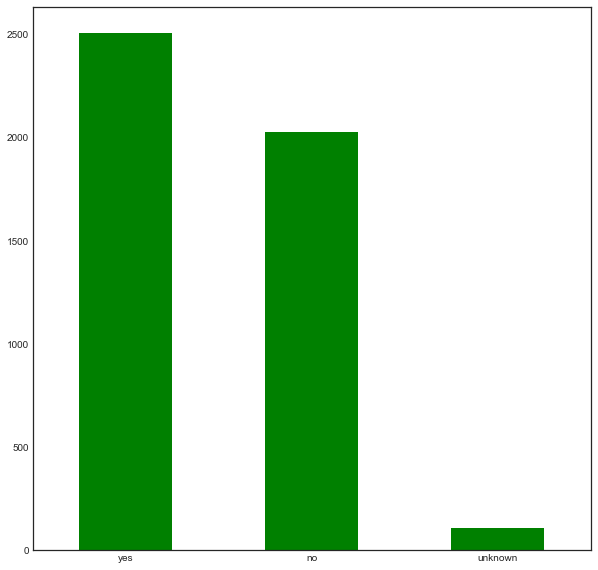

In [688]:
aceptaron['housing'].value_counts().plot(kind='bar',figsize=(10,10),rot=0, color='green' )

## Estan pagando un prestamo

In [689]:
modelo['loan'].value_counts()

no         33648
yes         6188
unknown      983
Name: loan, dtype: int64

<AxesSubplot:>

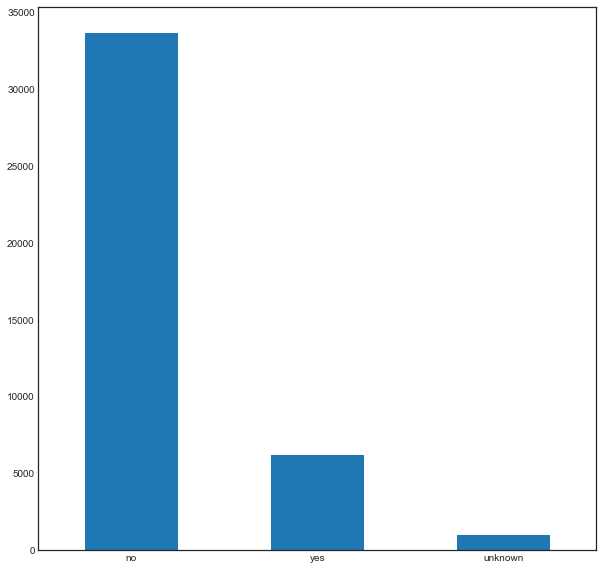

In [690]:
modelo['loan'].value_counts().plot(kind='bar',figsize=(10,10),rot=0 )

<AxesSubplot:>

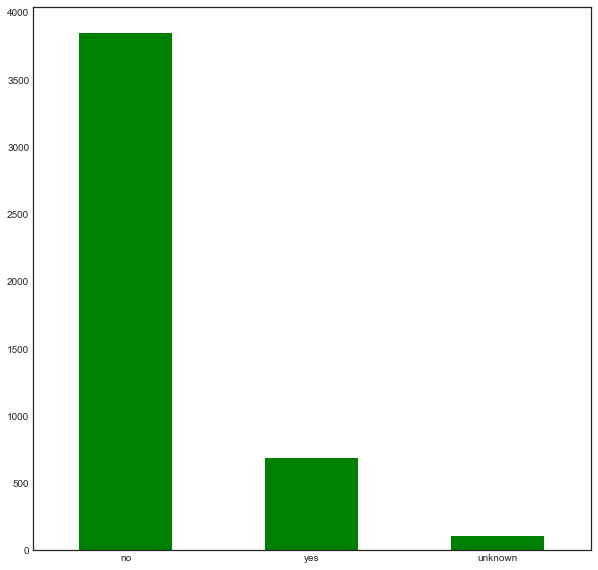

In [691]:
aceptaron['loan'].value_counts().plot(kind='bar',figsize=(10,10),rot=0, color='green' )

## Medio de contacto

In [692]:
modelo['contact'].value_counts()

cellular     25808
telephone    15011
Name: contact, dtype: int64

<AxesSubplot:>

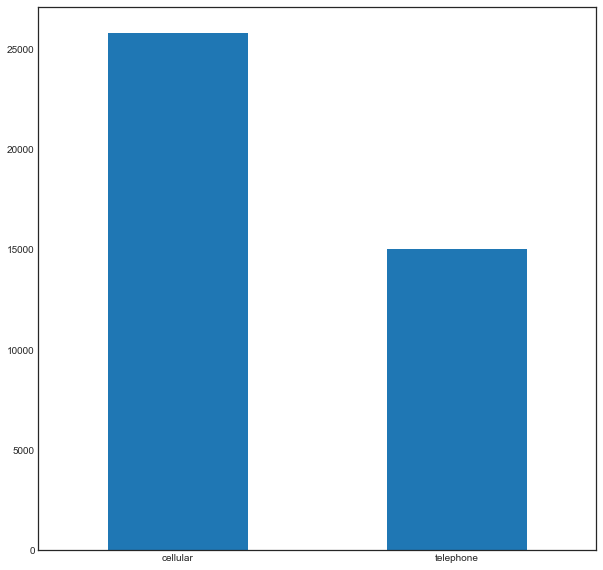

In [693]:
modelo['contact'].value_counts().plot(kind='bar',figsize=(10,10),rot=0 )

<AxesSubplot:>

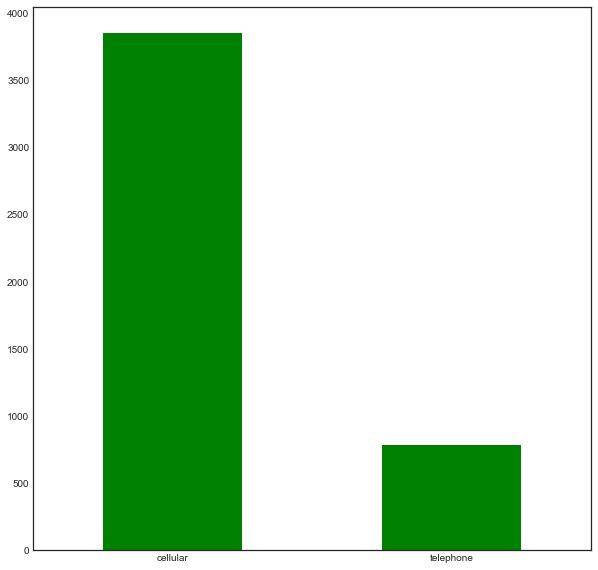

In [694]:
aceptaron['contact'].value_counts().plot(kind='bar',figsize=(10,10),rot=0, color='green' )

## Mes

In [695]:
modelo['month'].value_counts()

may    13740
jul     7145
aug     6109
jun     5302
nov     4068
apr     2582
oct      668
sep      531
mar      510
dec      164
Name: month, dtype: int64

<AxesSubplot:>

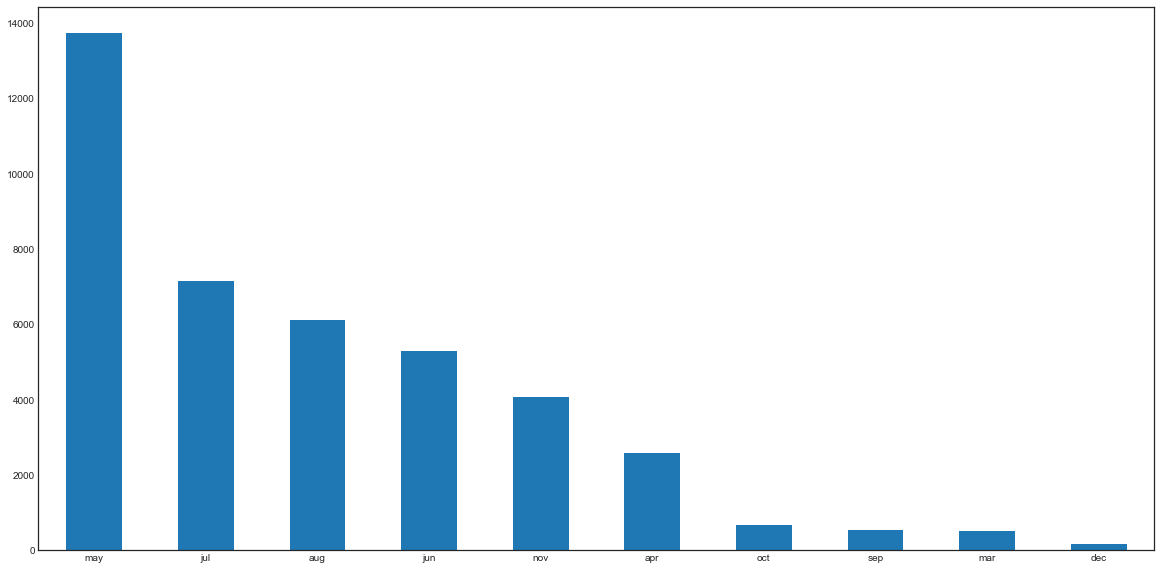

In [696]:
modelo['month'].value_counts().plot(kind='bar',figsize=(20,10),rot=0 )

<AxesSubplot:>

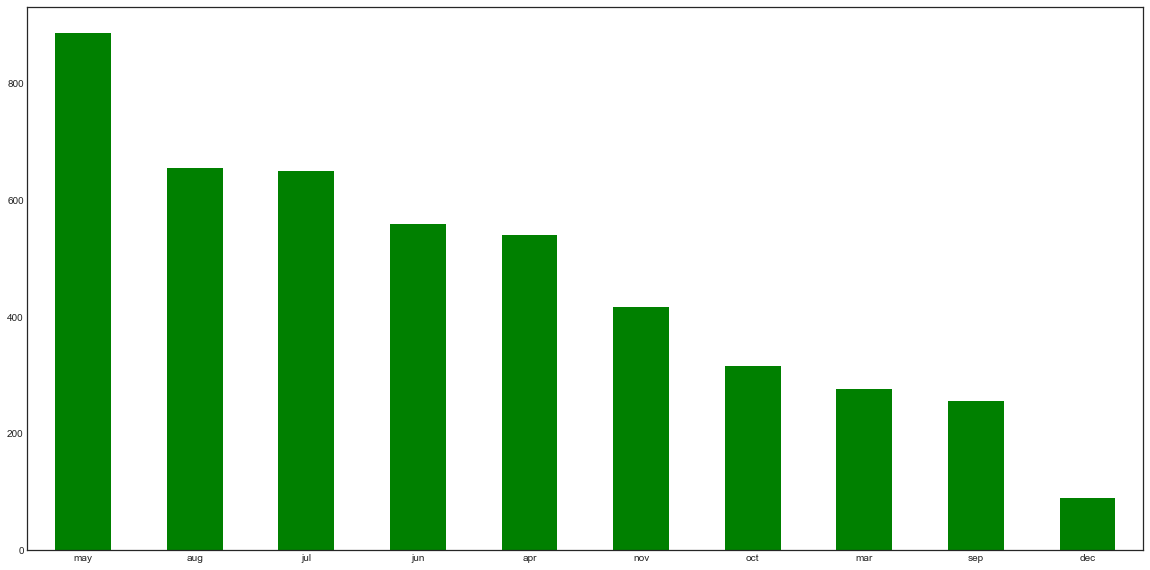

In [697]:
aceptaron['month'].value_counts().plot(kind='bar',figsize=(20,10),rot=0, color='green' )

## Dia de la semana

In [698]:
modelo['day_of_week'].value_counts()

thu    8549
mon    8442
wed    8065
tue    8008
fri    7755
Name: day_of_week, dtype: int64

<AxesSubplot:>

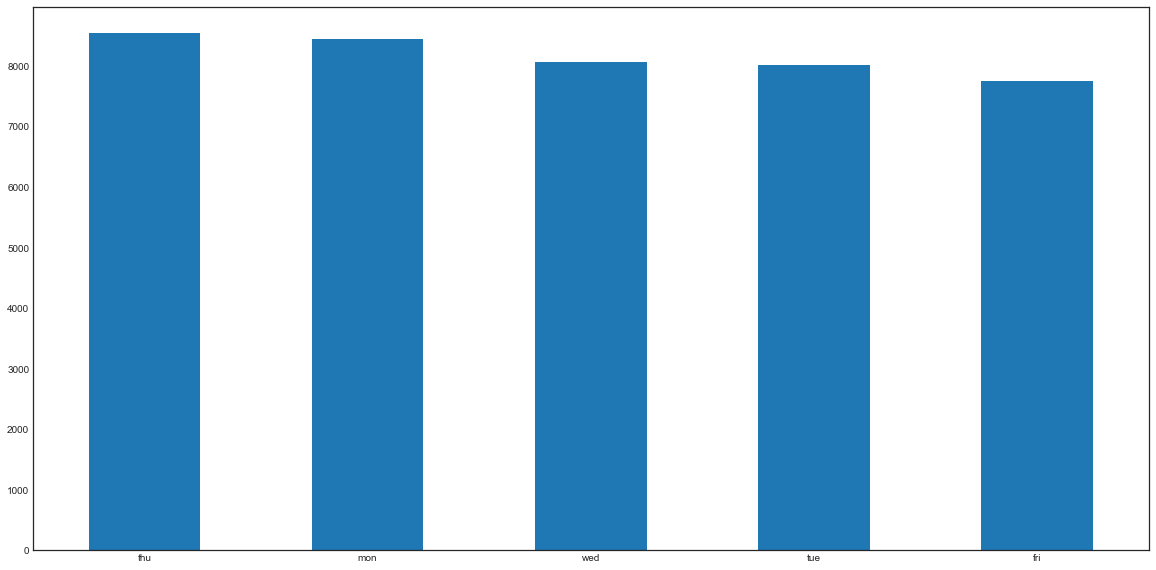

In [699]:
modelo['day_of_week'].value_counts().plot(kind='bar',figsize=(20,10),rot=0 )

<AxesSubplot:>

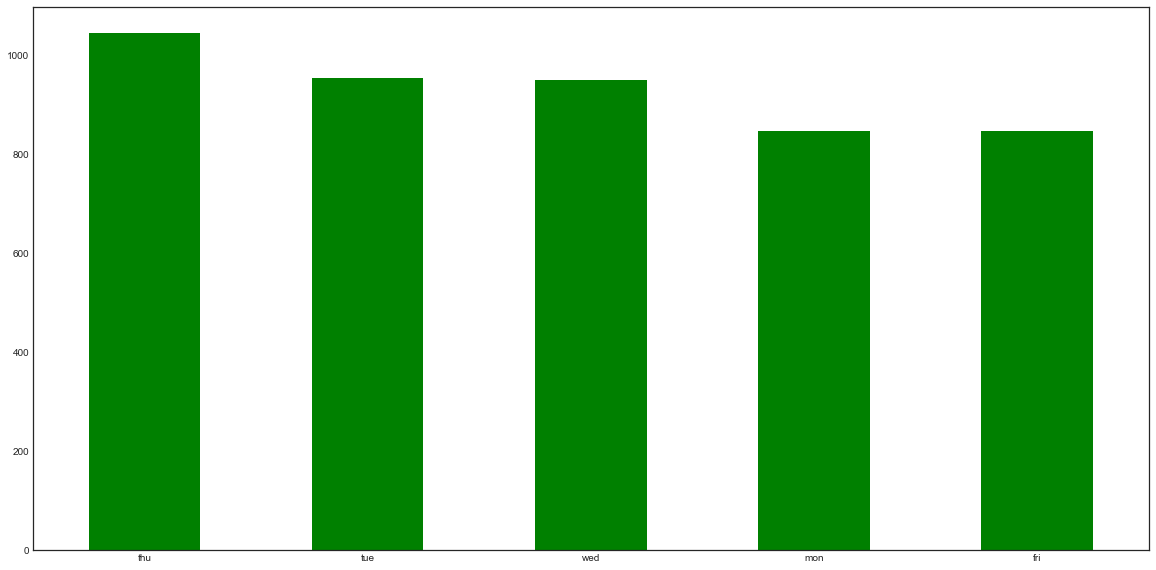

In [700]:
aceptaron['day_of_week'].value_counts().plot(kind='bar',figsize=(20,10),rot=0, color='green' )

## Duracion de la llamada

In [701]:
modelo['duration'].value_counts().nlargest(30)

90     168
85     168
136    167
73     167
124    163
72     161
87     160
104    160
111    159
106    157
97     157
109    157
92     156
122    156
114    154
119    153
89     153
139    153
82     152
71     152
76     151
107    150
93     150
135    150
125    149
88     149
96     149
123    149
126    148
83     148
Name: duration, dtype: int64

In [702]:
promedio_duracion_llamada = modelo['duration'].mean()
promedio_duracion_llamada

258.147774320782

In [703]:
modelo['duration'].describe()

count    40819.000000
mean       258.147774
std        259.700551
min          0.000000
25%        102.000000
50%        179.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

Text(0.5, 1.0, 'duration')

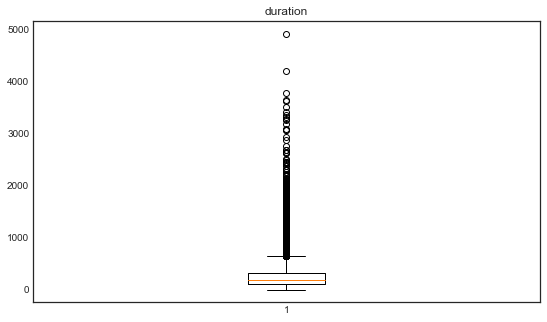

In [704]:
plt.figure(figsize = (20, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(523)
plt.boxplot(modelo['duration'])
ax.set_title('duration')

### Elimino los outliers

In [705]:
modelo = modelo[(np.abs(stats.zscore(modelo['duration'])) < 3)]

Text(0.5, 1.0, 'duration')

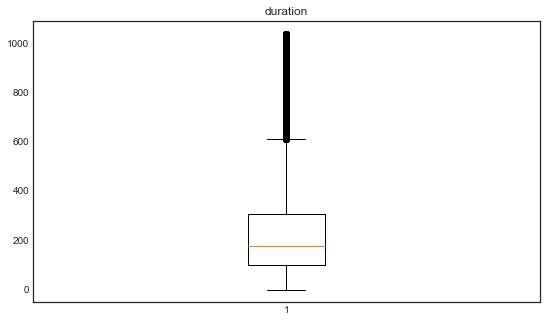

In [706]:
plt.figure(figsize = (20, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(523)
plt.boxplot(modelo['duration'])
ax.set_title('duration')

### Se observa que las llamadas duraron en promedio mas cuando la oferta fue aceptada

In [707]:
promedio_duracion_llamada_aceptaron = aceptaron['duration'].mean()
promedio_duracion_llamada_aceptaron

553.1911637931034

In [708]:
promedio_duracion_llamada_rechazaron = rechazaron['duration'].mean()
promedio_duracion_llamada_rechazaron

220.84480682937507

## Campaña 

In [709]:
modelo['campaign'].value_counts()

1     17153
2     10208
3      5168
4      2569
5      1566
6       952
7       611
8       393
9       274
10      219
11      173
12      123
13       90
14       68
17       55
16       50
15       50
18       33
20       30
19       25
21       24
22       17
23       16
24       15
27       11
29       10
28        8
25        8
31        7
26        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

Text(0.5, 1.0, 'campaign')

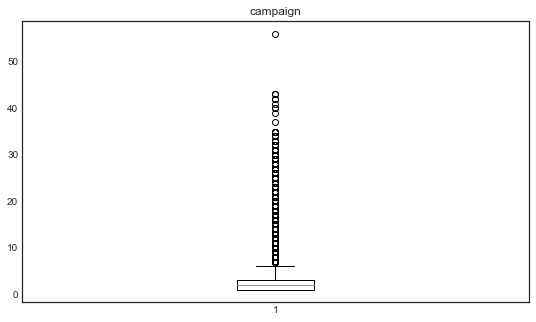

In [710]:
plt.figure(figsize = (20, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(523)
plt.boxplot(modelo['campaign'])
ax.set_title('campaign')

### Elimino los outliers

In [711]:
modelo = modelo[(np.abs(stats.zscore(modelo['campaign'])) < 3)]

Text(0.5, 1.0, 'campaign')

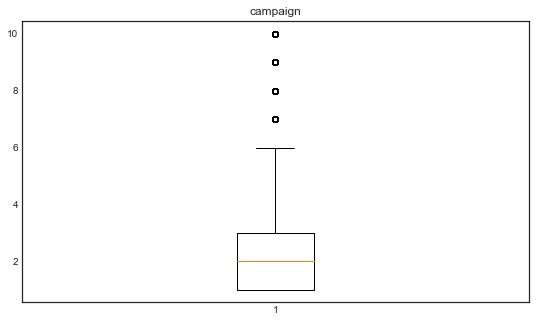

In [712]:
plt.figure(figsize = (20, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(523)
plt.boxplot(modelo['campaign'])
ax.set_title('campaign')

## Pdays 

### Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior, 999 significa que es la primera vez

In [713]:
modelo['pdays'].value_counts()

999    37707
3        401
6        378
4        111
2         59
9         59
7         56
12        54
10        50
5         44
13        33
11        27
1         26
15        22
14        18
8         16
0         15
16        11
17         8
18         7
22         3
21         2
19         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

# Encoding

## Mes y dias de las semanas

In [714]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
modelo['month']= modelo['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
modelo['day_of_week']= modelo['day_of_week'].map(day_dict) 

In [715]:
modelo.loc[:, ['month', 'day_of_week']].head()

,month,day_of_week
0,5,2
1,5,2
2,5,2
3,5,2
4,5,2


In [716]:
modelo.loc[modelo['pdays'] == 999, 'pdays'] = 0

## Pdays

In [717]:
modelo['pdays'].value_counts()

0     37722
3       401
6       378
4       111
2        59
9        59
7        56
12       54
10       50
5        44
13       33
11       27
1        26
15       22
14       18
8        16
16       11
17        8
18        7
22        3
21        2
19        2
25        1
26        1
27        1
20        1
Name: pdays, dtype: int64

## Convierto yes, no, unknown en 1,0 y -1

In [718]:
dictionary={'yes':1,'no':0,'unknown':-1}
modelo['housing']=modelo['housing'].map(dictionary)
modelo['default']=modelo['default'].map(dictionary)
modelo['loan']=modelo['loan'].map(dictionary)

### Target

In [719]:
dictionary1={'no':0,'yes':1}
modelo['y']=modelo['y'].map(dictionary1)

In [720]:
modelo.loc[:,['housing','default','loan','y']].head()

,housing,default,loan,y
0,0,0,0,0
1,0,-1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,1,0


## Convierto columnas categoricas a numericas

### Ver https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [721]:
dummy_contact=pd.get_dummies(modelo['contact'], prefix='dummy',drop_first=True)
dummy_outcome=pd.get_dummies(modelo['poutcome'], prefix='dummy',drop_first=True)
modelo = pd.concat([modelo,dummy_contact,dummy_outcome],axis=1)
modelo.drop(['contact','poutcome'],axis=1, inplace=True)

In [722]:
modelo.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

,dummy_telephone,dummy_nonexistent,dummy_success
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


## Reemplazo por frecuencia

In [723]:
job_column=modelo['job'].value_counts().to_dict()
education_column=modelo['education'].value_counts().to_dict()
modelo['job']=modelo['job'].map(job_column)
modelo['education']=modelo['education'].map(education_column)
modelo.loc[:,['job','education']].head()

,job,education
0,994,11767
1,3818,9084
2,3818,9084
3,9958,11767
4,3818,9084


## Convierto estado civil

In [724]:
marital_labels = {'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}
modelo['marital_ordinal']=modelo['marital'].map(marital_labels)
modelo.drop(['marital'], axis=1,inplace=True)
modelo.marital_ordinal.value_counts()

1    23654
2    11068
0     4317
3       74
Name: marital_ordinal, dtype: int64

# Machine Learning

In [725]:
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score,precision_score, classification_report
from sklearn.ensemble import ExtraTreesClassifier

## Importancia de las columnas

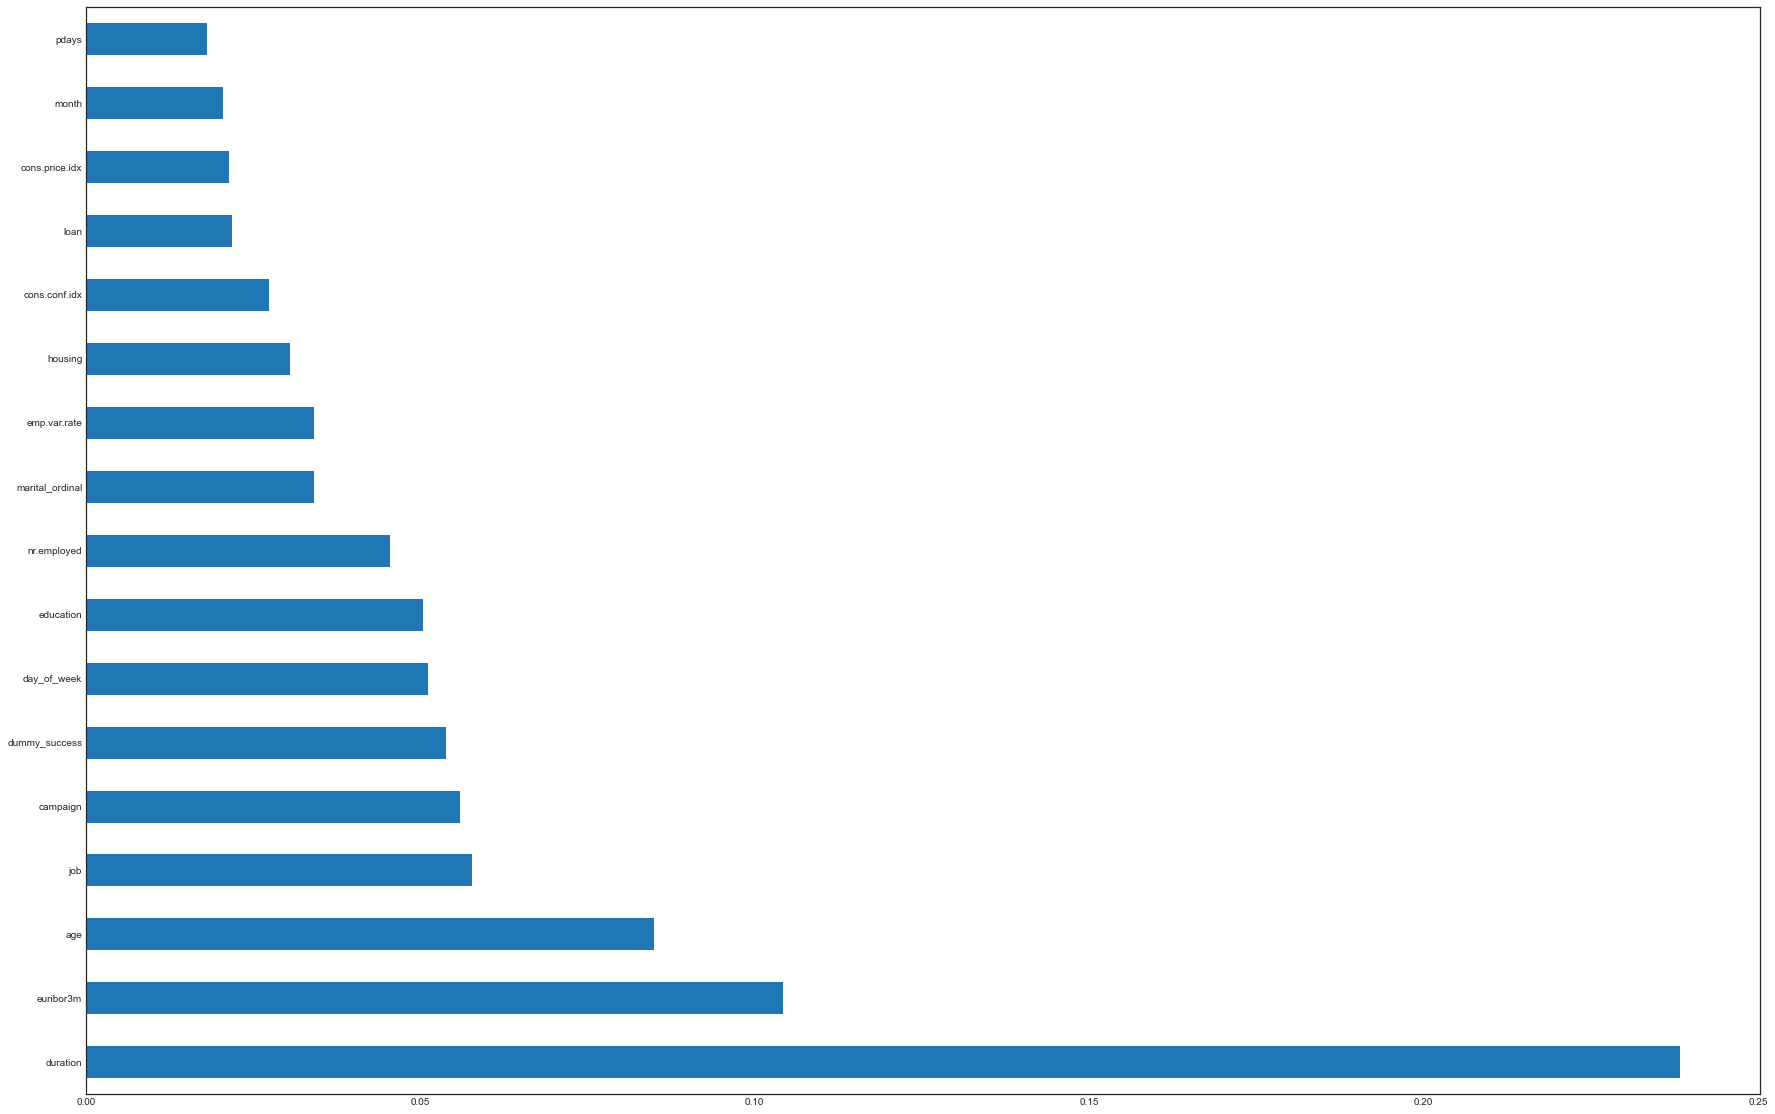

In [726]:
X=modelo.drop(['y'],axis=1)
y=modelo['y']
importance = ExtraTreesClassifier()
importance.fit(X,y)
feat_importances = pd.Series(importance.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh',figsize=(30,20))
plt.show()

## Defino el set de entrada y el target

In [727]:
X = modelo.drop(['pdays','month','cons.price.idx','loan','housing','emp.var.rate','y'], axis=1)
y = modelo['y']

## Separo en set de entrenamiento y de prueba (80% y 20%)

In [728]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42) 

In [729]:
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (31290, 15)
Input Test: (7823, 15)
Output Training: (31290,)
Output Test: (7823,)


In [730]:
X_train.head()

,age,job,education,default,day_of_week,duration,campaign,previous,cons.conf.idx,euribor3m,nr.employed,dummy_telephone,dummy_nonexistent,dummy_success,marital_ordinal
33574,34,1355,11623,0,3,194,3,0,-46.2,1.291,5099.1,0,1,0,2
5321,27,8852,1612,0,6,187,1,0,-36.4,4.857,5191.0,1,1,0,1
7391,37,8852,11767,-1,6,343,3,0,-36.4,4.864,5191.0,1,1,0,1
36512,29,9958,11623,0,4,174,1,0,-40.8,1.260,5076.2,0,1,0,2
8571,31,3818,9084,0,4,216,1,0,-41.8,4.864,5228.1,1,1,0,2


## Algoritmos de clasificación

## Logistic Regression

In [737]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [738]:
logreg_cv = LogisticRegression(random_state=0)
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
cv_dict = {0: 'Logistic Regression',1:'KNN',2:'SVC'}
cv_models=[logreg_cv,knn_cv,svc_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8711656049556623
KNN Test Accuracy: 0.8550318330292779
SVC Test Accuracy: 0.8995218967110228


In [754]:
clf1 = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf1.predict(X_test)

In [755]:
print('Precision: {:.4f}'.format(clf1.score(X_test, y_test)))

Precision: 0.9094


In [758]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confucion:\n",confusion_matrix)
print("Reporte :\n",classification_report(y_test, y_pred))

Matriz de confucion:
 [[6872  161]
 [ 548  242]]
Reporte :
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7033
           1       0.60      0.31      0.41       790

    accuracy                           0.91      7823
   macro avg       0.76      0.64      0.68      7823
weighted avg       0.89      0.91      0.90      7823



### Grid search

In [759]:
# param_grid = {'C': np.logspace(-4, 4, 50),
#              'penalty':['l1', 'l2','elasticnet'],
#              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
# best_model = clf.fit(X_train,y_train)
# print(best_model.best_estimator_)
# print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

In [760]:
clf1 = LogisticRegression(random_state=0, C=0.05963623316594643, solver='newton-cg').fit(X_train, y_train)
y_pred = clf1.predict(X_test)

In [761]:
print('Precision: {:.4f}'.format(clf1.score(X_test, y_test)))

Precision: 0.9176


In [762]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confucion:\n",confusion_matrix)
print("Reporte :\n",classification_report(y_test, y_pred))

Matriz de confucion:
 [[6875  158]
 [ 487  303]]
Reporte :
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      7033
           1       0.66      0.38      0.48       790

    accuracy                           0.92      7823
   macro avg       0.80      0.68      0.72      7823
weighted avg       0.91      0.92      0.91      7823



## SVC

In [763]:
clf2 = SVC(random_state=0).fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [764]:
print("Precision:",metrics.accuracy_score(y_test, y_pred))
print("Reporte :\n",classification_report(y_test,y_pred))

Precision: 0.8990157228684648
Reporte :
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      7033
           1       0.00      0.00      0.00       790

    accuracy                           0.90      7823
   macro avg       0.45      0.50      0.47      7823
weighted avg       0.81      0.90      0.85      7823

